# Project Scope
This project will investigate if there is a strong correlation between the economic performance (GDP, *Gross Domestic Product*) of a country and the life expectancy of its citizen. The data given includes the GDP and life expectancy of six countries from 2000 to 2015.

The goals are to prepare, analyze and visualize the data, and then seeking to explain the findings. 

Some questions the project seeks to answer are the following:
+ What is the average life expectancy of each of these six countries?
+ What is the distribution of the life expectancy?
+ What is the average GDP of each country?
+ What is the distribution of the GPD?
+ Does the life expectancy of the six countries change over time?
+ Does the GDP of the six countries change over time?
+ Is there a correlation between the GDP and the life expectancy of a country?

**Data Sources:**
+ Life expectancy: [World Health Organization (WHO)](http://apps.who.int/gho/data/node.main.688).

+ GDP: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

## Import Python Modules

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway, pearsonr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

## Load and Inspect Data

In [3]:
df = pd.read_csv('./all_data.csv')

df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Explore Data

In [6]:
# Countries included in the data
countries = list(df.Country.unique())
print(countries)

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


In [7]:
# Years included in the data
years = list(df.Year.unique())
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [8]:
# Rename "Life expectancy at birth (years)" to "LEABY" for better data wrangling
df.rename({'Life expectancy at birth (years)': 'LEABY'}, axis=1, inplace=True)
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [9]:
# Rename "United States of America" to "USA" for better graphical output
df.Country[df.Country == 'United States of America'] = 'USA'
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

### Life Expectancy

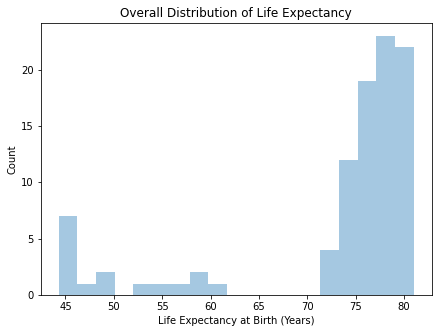

In [10]:
# Overall distribution of life expectancy for all countries
fig = plt.figure(figsize=(7,5))
sns.distplot(df.LEABY, kde=False)
plt.title('Overall Distribution of Life Expectancy')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.ylabel('Count')

plt.show()

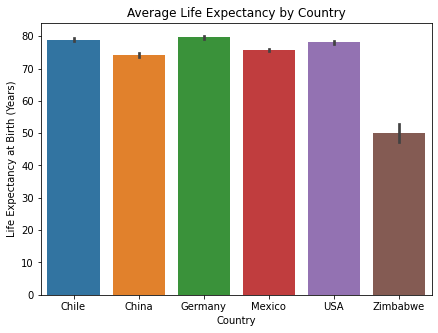

In [11]:
# Average life expectancy by country
fig = plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Country', y='LEABY')
plt.title('Average Life Expectancy by Country')
plt.ylabel('Life Expectancy at Birth (Years)')

plt.show()

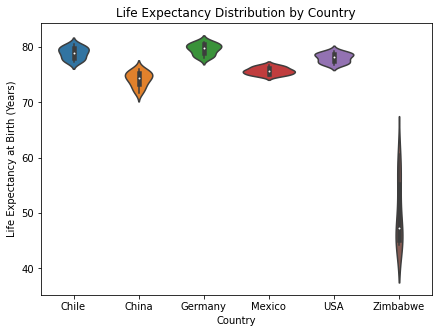

In [12]:
# Life expectancy distribution by country
fig = plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='Country', y='LEABY')
plt.title('Life Expectancy Distribution by Country')
plt.ylabel('Life Expectancy at Birth (Years)')

plt.show()

In [13]:
# Hypothesis test: life expectancy vs country (ANOVA & Tukey's range test)
# Significance threshold: 0.05
LEABY_chile = df.LEABY[df.Country == 'Chile']
LEABY_china = df.LEABY[df.Country == 'China']
LEABY_germany = df.LEABY[df.Country == 'Germany']
LEABY_mexico = df.LEABY[df.Country == 'Mexico']
LEABY_usa = df.LEABY[df.Country == 'USA']
LEABY_zimbabwe = df.LEABY[df.Country == 'Zimbabwe']

# ANOVA
ftest, pval = f_oneway(LEABY_chile, LEABY_china, LEABY_germany, LEABY_mexico, LEABY_usa, LEABY_zimbabwe)

print('ANOVA p-value:', pval)

# pval < significance threshold => correlation between life expectancy and country for at least one pair of means
# Tukey's range test
tukey_results = pairwise_tukeyhsd(df.LEABY, df.Country, 0.05)

print('\n', tukey_results)

ANOVA p-value: 7.885135700050126e-55

    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper   reject
---------------------------------------------------------
  Chile    China  -4.6812  0.001  -7.3453  -2.0172   True
  Chile  Germany   0.7125    0.9  -1.9516   3.3766  False
  Chile   Mexico   -3.225 0.0085  -5.8891  -0.5609   True
  Chile      USA  -0.8812    0.9  -3.5453   1.7828  False
  Chile Zimbabwe   -28.85  0.001 -31.5141 -26.1859   True
  China  Germany   5.3938  0.001   2.7297   8.0578   True
  China   Mexico   1.4563 0.5921  -1.2078   4.1203  False
  China      USA      3.8  0.001   1.1359   6.4641   True
  China Zimbabwe -24.1687  0.001 -26.8328 -21.5047   True
Germany   Mexico  -3.9375  0.001  -6.6016  -1.2734   True
Germany      USA  -1.5938 0.5066  -4.2578   1.0703  False
Germany Zimbabwe -29.5625  0.001 -32.2266 -26.8984   True
 Mexico      USA   2.3438 0.1179  -0.3203   5.0078  False
 Mexico Zimbabwe  -25.625  0.001 

ANOVA and Tukey results:
+ Significant p-value
+ Correlation between life expectancy and country (rejecting null hypothesis) for the following comparisons:
    + Chile vs China
    + Chile vs Mexico
    + Chile vs Zimbabwe
    + China vs Germany
    + China vs USA
    + China vs Zimbabwe
    + Germany vs Mexico
    + Germany vs Zimbabwe
    + Mexico vs Zimbabwe
    + USA vs Zimbabwe

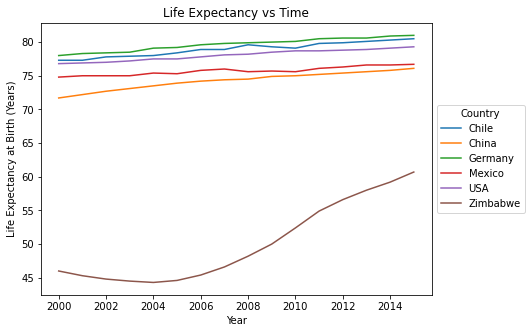

In [14]:
# Life expectancy vs time
fig = plt.figure(figsize=(7,5))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, .5))
plt.title('Life Expectancy vs Time')
plt.ylabel('Life Expectancy at Birth (Years)')

plt.show()

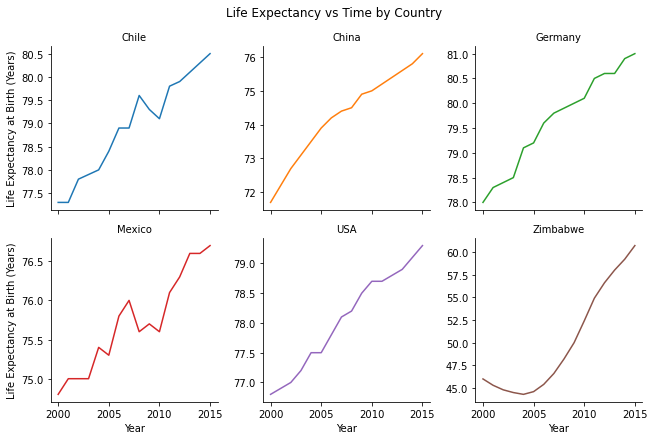

In [15]:
# Life expectancy vs time by country
gLEABY = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
plt.suptitle('Life Expectancy vs Time by Country')

gLEABY.map_dataframe(sns.lineplot, x='Year', y='LEABY')
gLEABY.set_axis_labels('Year', 'Life Expectancy at Birth (Years)')
gLEABY.set_titles(col_template='{col_name}')

plt.show()

In [16]:
# Correlation between life expectancy and time for each country
df_chile = df[df.Country == 'Chile']
df_china = df[df.Country == 'China']
df_germany = df[df.Country == 'Germany']
df_mexico = df[df.Country == 'Mexico']
df_usa = df[df.Country == 'USA']
df_zimbabwe = df[df.Country == 'Zimbabwe']

# Chile
r_chile, p_chile = pearsonr(df_chile.Year, df_chile.LEABY)

print('Chile:')
print('Pearson correlation coefficient:', r_chile)
print('p-value:', p_chile)

# China
r_china, p_china = pearsonr(df_china.Year, df_china.LEABY)

print('\nChina:')
print('Pearson correlation coefficient:', r_china)
print('p-value:', p_china)

# Germany
r_germany, p_germany = pearsonr(df_germany.Year, df_germany.LEABY)

print('\nGermany:')
print('Pearson correlation coefficient:', r_germany)
print('p-value:', p_germany)

# Mexico
r_mexico, p_mexico = pearsonr(df_mexico.Year, df_mexico.LEABY)

print('\nMexico:')
print('Pearson correlation coefficient:', r_mexico)
print('p-value:', p_mexico)

# USA
r_usa, p_usa = pearsonr(df_usa.Year, df_usa.LEABY)

print('\nUSA:')
print('Pearson correlation coefficient:', r_usa)
print('p-value:', p_usa)

# Zimbabwe
r_zimbabwe, p_zimbabwe = pearsonr(df_zimbabwe.Year, df_zimbabwe.LEABY)

print('\nZimbabwe:')
print('Pearson correlation coefficient:', r_zimbabwe)
print('p-value:', p_zimbabwe)

Chile:
Pearson correlation coefficient: 0.9805432853925484
p-value: 2.6887811767193966e-11

China:
Pearson correlation coefficient: 0.9827338172654216
p-value: 1.1720849060050303e-11

Germany:
Pearson correlation coefficient: 0.987376982327443
p-value: 1.324501395225501e-12

Mexico:
Pearson correlation coefficient: 0.950451368252526
p-value: 1.7238607351215283e-08

USA:
Pearson correlation coefficient: 0.9923116465397317
p-value: 4.172460194627515e-14

Zimbabwe:
Pearson correlation coefficient: 0.9239243587092394
p-value: 3.228316279752469e-07


### Life Expectancy: Findings
+ The overall distribution of the life expectancy in the data is very left-scewed with most of the values on the right side at higher values.
+ Chile and Germany have the highest average life expectancy (close to 80 years), closely followed by USA, Mexico and China (mid- to high-70s). Most of the values fall between a small range of years (~2-4 years).
+ Zimbabwe has the lowest average life expectancy (~50 years) where most of the values fall between a large range of years (~10 years)
+ There seems to be a correlation between mean life expectancy and country.
+ The life expectancy of all countries increase over time (2000-2015). However, it only increases slightly (~2-4 years) for Chile, China, Germany, Mexico and the USA, whereas for Zimbabwe there is a large increase of about 15 years.
+ For all countries, there is a strong positive linear correlation between life expectancy and time.

### GDP

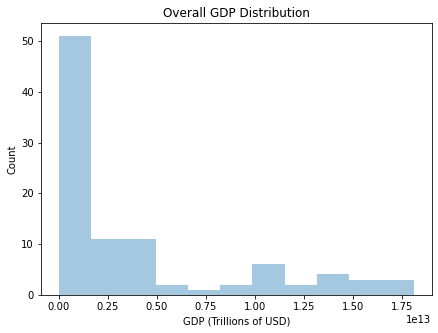

In [17]:
# Overall distribution of GDP for all countries
fig = plt.figure(figsize=(7,5))
sns.distplot(df.GDP, kde=False)
plt.title('Overall GDP Distribution')
plt.xlabel('GDP (Trillions of USD)')
plt.ylabel('Count')

plt.show()

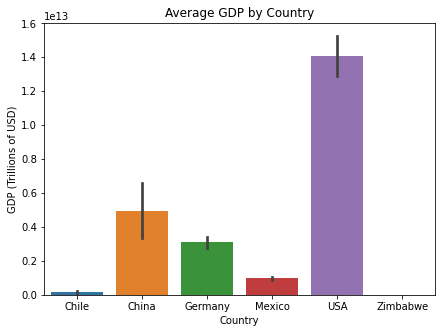

In [18]:
# Average GDP by Country
fig = plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Country', y='GDP')
plt.title('Average GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP (Trillions of USD)')

plt.show()

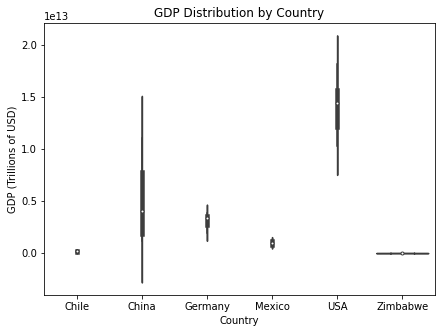

In [19]:
# GDP distribution by country
fig = plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='Country', y='GDP')
plt.title('GDP Distribution by Country')
plt.xlabel('Country')
plt.ylabel('GDP (Trillions of USD)')

plt.show()

In [20]:
# Hypothesis test: GDP vs country (ANOVA and Tukey's range test)
# Significance threshold: 0.05
GDP_chile = df.GDP[df.Country == 'Chile']
GDP_china = df.GDP[df.Country == 'China']
GDP_germany = df.GDP[df.Country == 'Germany']
GDP_mexico = df.GDP[df.Country == 'Mexico']
GDP_usa = df.GDP[df.Country == 'USA']
GDP_zimbabwe = df.GDP[df.Country == 'Zimbabwe']

# ANOVA
ftest, pval = f_oneway(GDP_chile, GDP_china, GDP_germany, GDP_mexico, GDP_usa, GDP_zimbabwe)

print('ANOVA p-value:', pval)

# pval < significance threshold => correlation between GDP and country for at least one pair of means
# Tukey's range test
tukey_results = pairwise_tukeyhsd(df.GDP, df.Country, 0.05)

print('\n', tukey_results)

ANOVA p-value: 1.0177777153618003e-41

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
 group1  group2        meandiff      p-adj         lower               upper        reject
------------------------------------------------------------------------------------------
  Chile    China  4787924904984.6875  0.001   2971784703971.257   6604065105998.118   True
  Chile  Germany  2924986779984.6875  0.001  1108846578971.2566   4741126980998.118   True
  Chile   Mexico   806861779984.6875 0.7616 -1009278421028.7434   2623001980998.118  False
  Chile      USA  13905211154984.688  0.001  12089070953971.256   15721351355998.12   True
  Chile Zimbabwe    -160726265420.25    0.9  -1976866466433.681   1655413935593.181  False
  China  Germany    -1862938125000.0  0.041   -3679078326013.43   -46797923986.5691   True
  China   Mexico    -3981063125000.0  0.001  -5797203326013.431  -2164922923986.569   True
  China      USA     9117286250000.0  0.001   7301

ANOVA and Tukey results:
+ Significant p-value
+ Correlation between GDP and country (rejecting null hypothesis) for the following comparisons:
    + Chile vs China
    + Chile vs Germany
    + Chile vs USA
    + China vs Germany
    + China vs Mexico
    + China vs USA
    + China vs Zimbabwe
    + Germany vs Mexico
    + Germany vs USA
    + Germany vs Zimbabwe
    + Mexico vs USA
    + USA vs Zimbabwe

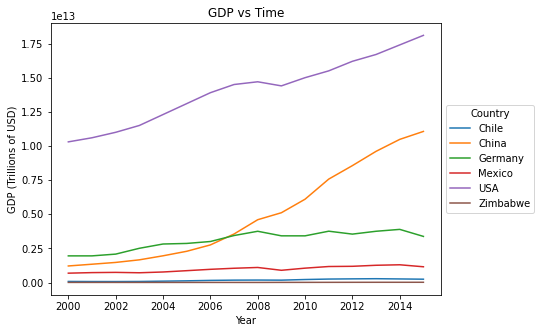

In [21]:
# GDP vs time
fig = plt.figure(figsize=(7,5))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.title('GDP vs Time')
plt.xlabel('Year')
plt.ylabel('GDP (Trillions of USD)')
plt.legend(loc='center left', bbox_to_anchor=(1,.5), title='Country')

plt.show()

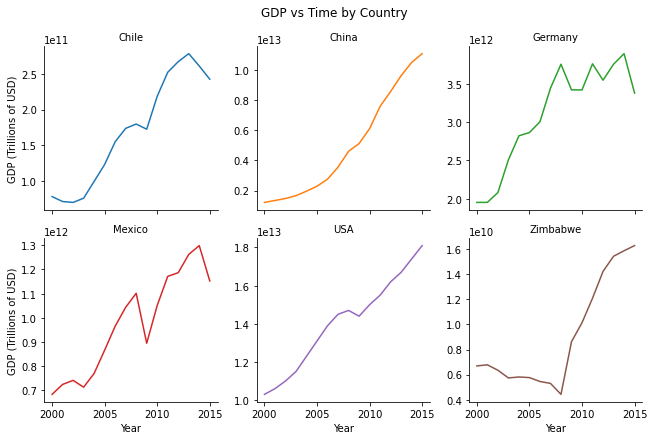

In [27]:
# GDP vs time by country
gGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
plt.suptitle('GDP vs Time by Country')

gGDP.map_dataframe(sns.lineplot, x='Year', y='GDP')
gGDP.set_axis_labels('Year', 'GDP (Trillions of USD)')
gGDP.set_titles(col_template='{col_name}')

plt.show()

In [23]:
# Correlation between GDP and time for each country
# Chile
r_chile, p_chile = pearsonr(df_chile.Year, df_chile.GDP)

print('Chile:')
print('Pearson correlation coefficient:', r_chile)
print('p-value:', p_chile)

# China
r_china, p_china = pearsonr(df_china.Year, df_china.GDP)

print('\nChina:')
print('Pearson correlation coefficient:', r_china)
print('p-value:', p_china)

# Germany
r_germany, p_germany = pearsonr(df_germany.Year, df_germany.GDP)

print('\nGermany:')
print('Pearson correlation coefficient:', r_germany)
print('p-value:', p_germany)

# Mexico
r_mexico, p_mexico = pearsonr(df_mexico.Year, df_mexico.GDP)

print('\nMexico:')
print('Pearson correlation coefficient:', r_mexico)
print('p-value:', p_mexico)

# USA
r_usa, p_usa = pearsonr(df_usa.Year, df_usa.GDP)

print('\nUSA:')
print('Pearson correlation coefficient:', r_usa)
print('p-value:', p_usa)

# Zimbabwe
r_zimbabwe, p_zimbabwe = pearsonr(df_zimbabwe.Year, df_zimbabwe.GDP)

print('\nZimbabwe:')
print('Pearson correlation coefficient:', r_zimbabwe)
print('p-value:', p_zimbabwe)

Chile:
Pearson correlation coefficient: 0.9622885247911158
p-value: 2.632271096152365e-09

China:
Pearson correlation coefficient: 0.9694466509767482
p-value: 6.147544512333805e-10

Germany:
Pearson correlation coefficient: 0.8943343102186396
p-value: 2.9702037369223235e-06

Mexico:
Pearson correlation coefficient: 0.9370871761678186
p-value: 8.848452338569989e-08

USA:
Pearson correlation coefficient: 0.9900471511813294
p-value: 2.5269688493072597e-13

Zimbabwe:
Pearson correlation coefficient: 0.8375315246491081
p-value: 5.1547418558278904e-05


### GDP: Findings
+ The overall distribution of the GDP is very right-scewed with most of the values on the left side at low values. This is quite the opposite compared to the life expectancy distribution.
+ The USA has by far the highest average GDP at about 14 trillion USD.
+ China and Germany both have a moderate average GDP at about 5 trillion USD and 3 trillion USD, respectively.
+ Mexico and Chile both have a low average GDP at about 1 trillion USD and 0,2 trillion USD, respectively.
+ Zimbabwe has the lowest average GDP at about 10 billion USD.
+ The GDP values of China and the USA fall between a large range of USD, whereas the GDP values of the rest of the countries fall between a relatively small range of USD.
+ There seems to be a correlation between mean GDP and country.
+ The GDP of all countries increases over time (2000-2015), although the increase of the GDP of Germany, Mexico, Chile and Zimbabwe is relatively insignificant compared to the large GDP increase of China and the USA.
+ For all countries, there is a strong positive linear correlation between GDP and time. Though, it is less for Germany and Zimbabwe compared to the other countries.

### GDP vs Life Expectancy

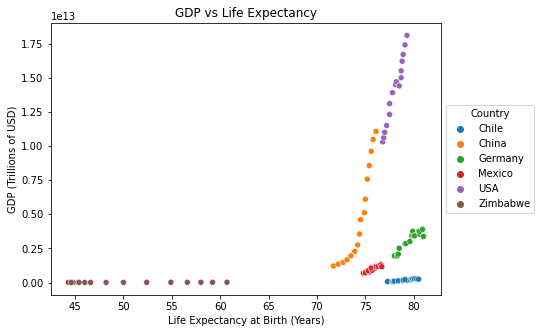

In [24]:
# Overall GDP vs life expectancy
fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='LEABY', y='GDP', hue='Country')
plt.title('GDP vs Life Expectancy')
plt.xlabel('Life Expectancy at Birth (Years)')
plt.ylabel('GDP (Trillions of USD)')
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, .5))

plt.show()

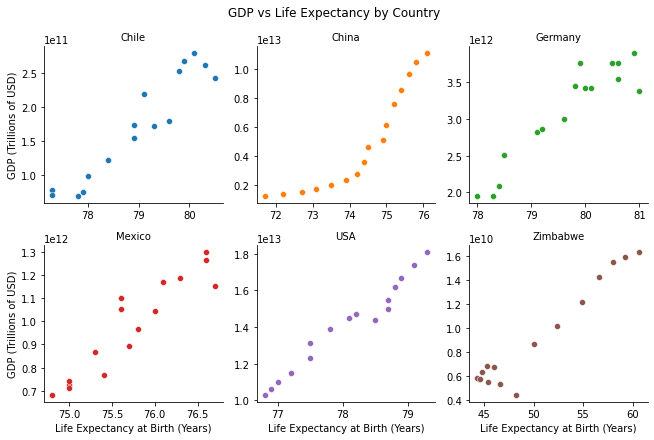

In [28]:
# GDP vs life expectancy by country
gGDP_LEABY = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharex=False, sharey=False)
plt.suptitle('GDP vs Life Expectancy by Country')

gGDP_LEABY.map_dataframe(sns.scatterplot, x='LEABY', y='GDP')
gGDP_LEABY.set_axis_labels('Life Expectancy at Birth (Years)', 'GDP (Trillions of USD)')
gGDP_LEABY.set_titles(col_template='{col_name}')

plt.show()

In [26]:
# Correlation between GDP and life expectancy for each country
# Chile
r_chile, p_chile = pearsonr(df_chile.LEABY, df_chile.GDP)

print('Chile:')
print('Pearson correlation coefficient:', r_chile)
print('p-value:', p_chile)

# China
r_china, p_china = pearsonr(df_china.LEABY, df_china.GDP)

print('\nChina:')
print('Pearson correlation coefficient:', r_china)
print('p-value:', p_china)

# Germany
r_germany, p_germany = pearsonr(df_germany.LEABY, df_germany.GDP)

print('\nGermany:')
print('Pearson correlation coefficient:', r_germany)
print('p-value:', p_germany)

# Mexico
r_mexico, p_mexico = pearsonr(df_mexico.LEABY, df_mexico.GDP)

print('\nMexico:')
print('Pearson correlation coefficient:', r_mexico)
print('p-value:', p_mexico)

# USA
r_usa, p_usa = pearsonr(df_usa.LEABY, df_usa.GDP)

print('\nUSA:')
print('Pearson correlation coefficient:', r_usa)
print('p-value:', p_usa)

# Zimbabwe
r_zimbabwe, p_zimbabwe = pearsonr(df_zimbabwe.LEABY, df_zimbabwe.GDP)

print('\nZimbabwe:')
print('Pearson correlation coefficient:', r_zimbabwe)
print('p-value:', p_zimbabwe)

Chile:
Pearson correlation coefficient: 0.9498766659254416
p-value: 1.865913974658531e-08

China:
Pearson correlation coefficient: 0.9085255408648358
p-value: 1.1250985720700642e-06

Germany:
Pearson correlation coefficient: 0.9326988982561268
p-value: 1.401881553404592e-07

Mexico:
Pearson correlation coefficient: 0.9322377167847081
p-value: 1.4686960248305143e-07

USA:
Pearson correlation coefficient: 0.9817092382430257
p-value: 1.7499709269099464e-11

Zimbabwe:
Pearson correlation coefficient: 0.9661998955858777
p-value: 1.2358516366846197e-09


### GDP vs Life Expectancy: Findings
+ Overall, the life expectancy of all countries increase with increasing GDP, although the increase of the GDP seems quite small for Zimbabwe compared to the other countries.
+ Chile, Germany, Mexico, USA and Zimbabwe all have a linear relationship between the GDP and the life expectancy, whereas China seems to have a exponential relationship between those two variables.
+ For all countries, there seems to be a strong positive correlation between the GDP and the life expectancy.

## Conclusions

Although the dataset only had 96 rows and 4 columns, the project yielded quite a few data visualizations.

As a result, the project was able to answer the questions posed in the beginning:
+ What is the average life expectancy of each of these six countries?
    + The averafe life expectancy of all countries was in the mid- to high-70s, except for Zimbabwe, where it was only at about 50 years.
+ What is the distribution of the life expectancy?
    + The life expectancy is very left-scewed, meaning most of the values fall on the right-hand side.
+ What is the average GDP of each country?
    + The average GDP of the countries is quite different for each country. While the USA has the highest GDP at about 14 trillion USD, the average GDP of the other countries except Zimbabwe falls between 0,2 - 5 trillion USD. The average GDP of Zimbabwe is the lowest at only 10 billion USD.
+ What is the distribution of the GPD?
    + The GDP is very right-scewed, meaning most of the values fall on the left-hand side. This is quite the oppisite compared to the distribution of the life expectancy.
+ Does the life expectancy of the six countries change over time?
    + For all countries, the life expectancy increases over time (2000-2015) with Zimbabwe having the largest increase. There is a strong positive linear correlation.
+ Does the GDP of the six countries change over time?
    + For all countries, the GDP increases over time (2000-2015) with China having the largest increase. There is a strong positive linear correlation.
+ Is there a correlation between the GDP and the life expectancy of a country?
    + For all countries, there is a strong positive correlation between the GDP and the life expectancy. This correlation seems to be linear for all countries except China, for which it seems exponential.